<h2 style="color:green; background-color:white; text-align:center; font-weight:bold;">VEGETABLE PRICES DATA ANALYSIS PROJECT</h2>

## 1. PROJECT OVERVIEW

#### 1.1. Introduction

In the bustling world of agricultural markets, where prices can fluctuate as wildly as the weather, understanding the dynamics of vegetable prices is crucial. Picture this: a farmer waking up before dawn, carefully tending to rows of vibrant green crops, each one representing not just sustenance, but livelihood. Yet, as the sun rises, so does uncertainty. Will the prices at market today yield enough profit to sustain the farm? Or will they plummet unexpectedly, leaving the farmer grappling with the harsh realities of an unpredictable market?

#### 1.2. Problem Statement:

The Directorate of Marketing & Inspection (DMI), Ministry of Agriculture and Farmers Welfare and the Government of India, collects extensive data on vegetable prices across different regions in India. However, the lack of comprehensive analysis and insights derived from this data hinders effective decision-making in the agricultural sector. Therefore, the primary problem addressed in this project is to analyze the vegetable pricing trends over a one-year period, leveraging the available dataset. Specifically, the analysis aims to identify patterns, trends, and factors influencing price fluctuations in various types of vegetables across different regions. By addressing this problem, the project seeks to provide actionable insights that can inform policymakers, farmers, and traders, facilitating better decision-making and optimization of pricing strategies, supply chain efficiency, and risk mitigation in the agricultural market.

#### 1.3. Objective of the Project: 

•To analyze vegetable pricing trends across different regions in India over a year.

•To identify patterns, trends, and factors influencing price fluctuations in agricultural markets. 

•To provide insights that can inform stakeholders such as policymakers, farmers, and traders, facilitating better decision-making in the agricultural sector.

#### 1.4. Data Source: 

The dataset used in this project is from Kaggle and was sourced from the Directorate of Marketing & Inspection (DMI), Ministry of Agriculture and Farmers Welfare, Government of India. The dataset comprises prices of ten different types of vegetables recorded over time, allowing for comprehensive analysis of pricing dynamics.

#### 1.5. Importance of the Study:

This project holds significant importance in understanding the dynamics of vegetable pricing in India's agricultural market. Analyzing vegetable price trends can aid in optimizing pricing strategies, enables better resource allocation, market forecasting, policy formulation to ensure food security and economic stabilityimproving supply chain efficiency, and mitigating risks associated with price fluctuations. Additionally, insights derived from this study can contribute to informed decision-making by policymakers, ultimately benefiting farmers, traders, and consumers alike. Understanding vegetable price dynamics is crucial for stakeholders in agriculture, economics, and public policy.

#### 1.6. Key Questions or Hypotheses:

•   What external factors influence price volatility, such as weather conditions or supply chain disruptions?

•	Are there significant variations in prices among different types of vegetables?

•	How do external factors such as seasonality, market demand influence vegetable prices?

•	Can we identify any patterns or anomalies in pricing trends that may require further investigation?

#### 1.7. Methodology Overview:

•	The analysis will involve exploratory data analysis (EDA) to visualize and understand the distribution of vegetable prices over time and across regions. 

•	Statistical analysis will be conducted to quantify variability, identify significant differences, and assess correlations between variables. 

•	Time series analysis techniques will be employed to model and forecast future vegetable prices. 

•	Additionally, predictive modeling may be utilized to estimate pricing trends based on historical data and relevant features.

#### 1.8. Expected Outcomes: 

The project is expected to yield insights into the drivers of vegetable pricing trends in India, including seasonal patterns, regional variations, and the impact of external factors. These findings can inform stakeholders about market dynamics, enabling them to make informed decisions and implement strategies to enhance efficiency and stability in the agricultural sector.

## 2. IMPORTING PACKAGES

In [56]:
# Libraries for data loading, manipulation and analysis
!pip install missingno
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import statsmodels.api as sm


# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (1926367569.py, line 4)

## 3. LOADING DATA

In [35]:
# loading dataset
df = pd.read_csv("prices.csv", index_col=False)
df.head(10)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
5,11-01-2023,35.0,16,18.0,24,25,55,23,6,35.0,30
6,12-01-2023,40.0,16,18.0,22,30,65,23,6,35.0,30
7,15-01-2023,42.0,16,17.0,22,25,65,23,7,35.0,30
8,17-01-2023,35.0,16,18.0,22,30,65,22,10,40.0,35
9,22-01-2023,45.0,16,18.0,22,40,65,25,9,40.0,35


<font color="red" face="arial">To prevent any major unnecessary changes occurring to the original data, a copy of the dataframe was made using the df.copy() method and referred to as <span style="background-color: pink;">`df_copy`</span>.</font>

In [36]:
# The copy of the dataframe
df_copy = df.copy()

First look at the shape of the dataframe by using .shape.

In [37]:
# Displays the number of rows and columns
df_copy.shape

(287, 11)

Results : The dataset consists of 287 rows (observations) and 11 columns (features).

One of the univariate analysis (non-graphical), is the method .info(). This method outputs important details about the dataset which includes the columns: the data types (Dtype) of the columns and the count of non-null values.

In [38]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


Results: 

## 4. DATA CLEANING

Data cleaning is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis. It is a crucial step in the data analysis process as it ensures that the data used for analysis is accurate, complete, and consistent.Data cleaning typically involves several steps, including: Handling missing data, Removing duplicates, Standardizing data formats, Handling outliers, Normalizing or scaling data and Data validation

The check_null_values function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [39]:
def check_null_values(df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_copy:
        if df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))

In [40]:
check_null_values(df_copy)

Results: There are no null values

The preprocess_data function performs essential data cleaning operations on a DataFrame, setting missing values, filling in gaps with statistical measures (mean and median), and dropping non-essential columns. After processing, it prints the first two rows of the cleaned DataFrame for quick inspection and returns the entire modified DataFrame for further use.

In [42]:
def preprocess_data(df_copy):
    return df_copy

cleaned_df = preprocess_data(df)

# Display the cleaned DataFrame
print(cleaned_df)

    Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    01-01-2023                    35.0      18   22.0      20       30   
1    02-01-2023                    35.0      16   22.0      20       30   
2    03-01-2023                    35.0      16   21.0      20       30   
3    04-01-2023                    30.0      16   21.0      22       25   
4    08-01-2023                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  27-12-2023                    45.0      16   30.0      20       70   
283  28-12-2023                    45.0      16   30.0      20       70   
284  29-12-2023                    45.0      16   30.0      22       80   
285  31-12-2023                    45.0      16   26.0      20       60   
286  01-01-2024                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0        50    25      8          45

We will conduct summary statistics to see how our data is distributed. This will assist us with checking for outliers which could be due to errors. 

In [44]:
summary_stats = df_copy.describe()
print(summary_stats)

       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000   35.000000   
max                 60.000000   18.000000   57.000000   24.000000   80.000000   

           Garlic        Peas        Methi  Green Chilli  Elephant Yam (Suran)  
count  287.000000  287.000000   287.000000    287.000000            287.000000  
mean   133.101045   66.658537    20.383275     44.122404             28.797909  
std     60.078331   33.3024

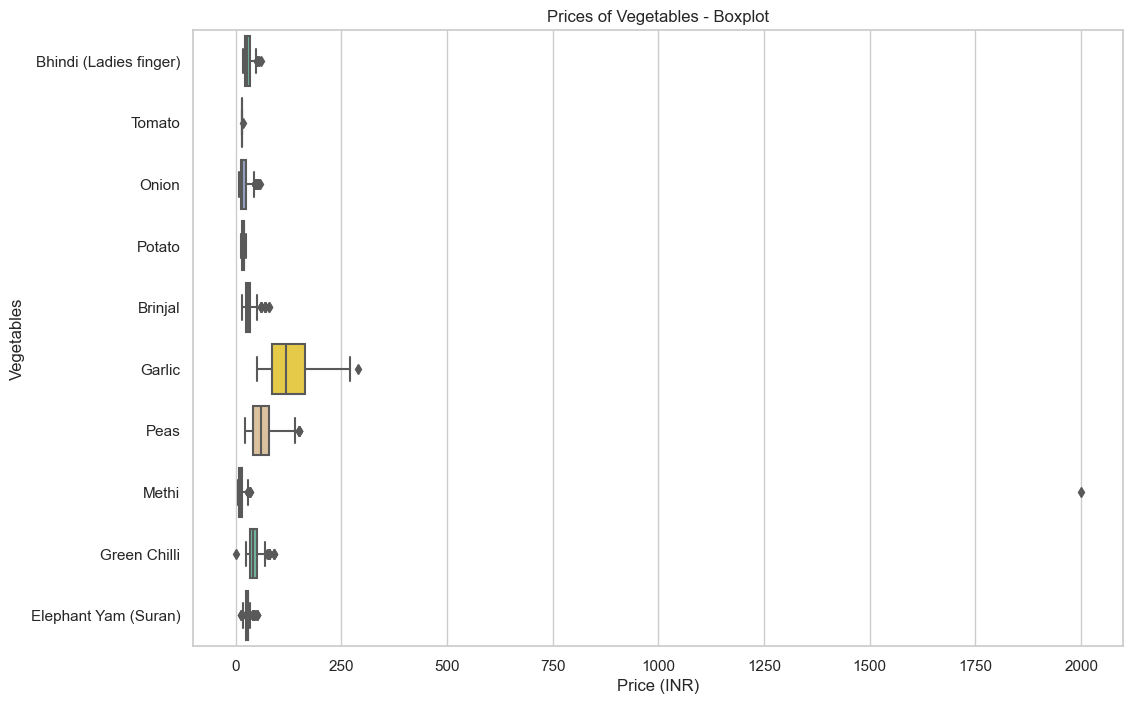

In [51]:
## CHECKING FOR OUTLIERS

import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create boxplot for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_copy, orient='h', palette='Set2')
plt.xlabel('Price (INR)')
plt.ylabel('Vegetables')
plt.title('Prices of Vegetables - Boxplot')
plt.show()

Results: There is a value which is extreme and could be due to typing error. We are going to replace the value 2000 on Methi with a Null value

In [52]:
# Replace the value of 2000 with NaN in the 'Methi' column
df_copy['Methi'] = df_copy['Methi'].replace(2000, np.nan)

In [53]:
summary_stats = df_copy.describe()
print(summary_stats)

       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000   35.000000   
max                 60.000000   18.000000   57.000000   24.000000   80.000000   

           Garlic        Peas       Methi  Green Chilli  Elephant Yam (Suran)  
count  287.000000  287.000000  286.000000    287.000000            287.000000  
mean   133.101045   66.658537   13.461538     44.122404             28.797909  
std     60.078331   33.302415 

When we loaded the data and checked the summary information about the DataFrame, we noticed that the variable Price dates is an object. We will not change it into date format.

In [54]:
# Convert 'Price Dates' column to datetime format
# Convert 'Price Dates' column to datetime format with the correct date format
df_copy['Price Dates'] = pd.to_datetime(df_copy['Price Dates'], format='%d-%m-%Y')
